In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from scipy.stats import beta
import scipy as sp

plt.rcParams.update({"text.usetex": True, 'font.size': 18, 'font.family': 'serif', "figure.figsize": [12, 7]})

In [223]:
df = pd.read_csv("data.csv")
df

,order,distance
0,1,0.000043
1,1,0.000011
2,1,0.000117
3,1,0.000144
4,1,0.000052
...,...,...
2195,20,0.001081
2196,20,0.001148
2197,20,0.001187
2198,20,0.001205


Text(0, 0.5, 'Mean Distance')

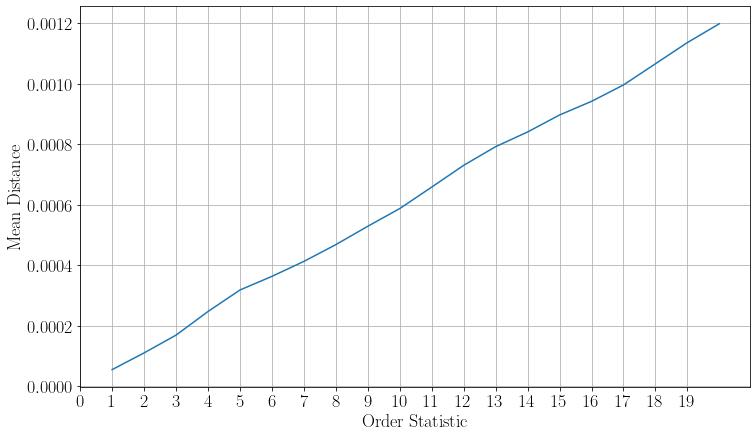

In [224]:
fig, ax = plt.subplots()

xs = np.arange(0, 20, step=1)
ax.plot(xs + 1, np.array(df.groupby("order").mean())); ax.grid(); ax.set_xticks(xs)
ax.set_xlabel("Order Statistic"); ax.set_ylabel("Mean Distance")

Text(0, 0.5, 'Mean Distance')

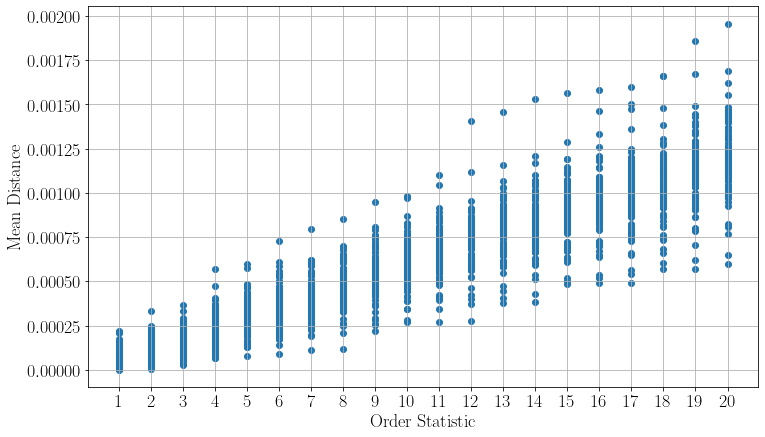

In [225]:
fig, ax = plt.subplots()

ax.scatter(df.iloc[:,0], df.iloc[:, 1])
xs = np.arange(1, 21, step=1)
ax.set_xticks(np.arange(1, 21, step=1)); ax.set_xticklabels(xs), ax.grid(); ax.set_xlabel("Order Statistic"); ax.set_ylabel("Mean Distance")

In [28]:
def linear_fit(x, a):
    return a * x

popt, pcov = sp.optimize.curve_fit(
    linear_fit,
    np.arange(1, 21, step=1),
    df.groupby("order").mean()["distance"],
    sigma=df.groupby("order").std()["distance"],
    absolute_sigma=True
)
perr = np.sqrt(np.diag(pcov))
popt, pcov, perr

(array([5.9515256e-05]), array([[7.8670518e-12]]), array([2.80482652e-06]))

In [106]:
weights = 1/np.array(df.groupby("order").std()["distance"])
xs = np.arange(1, 21, step=1)
ys = np.array(df.groupby("order").mean()["distance"])
(p0, p1), V = np.polyfit(xs, ys, 1, w=weights, cov='unscaled')

p0, p1, np.sqrt(np.diag(V))

(6.00281873864894e-05,
 -5.398855628093128e-06,
 array([4.20213585e-06, 3.29346941e-05]))

(6.00281873864894e-05, -5.398855628093128e-06, 0.0036127994196428043)

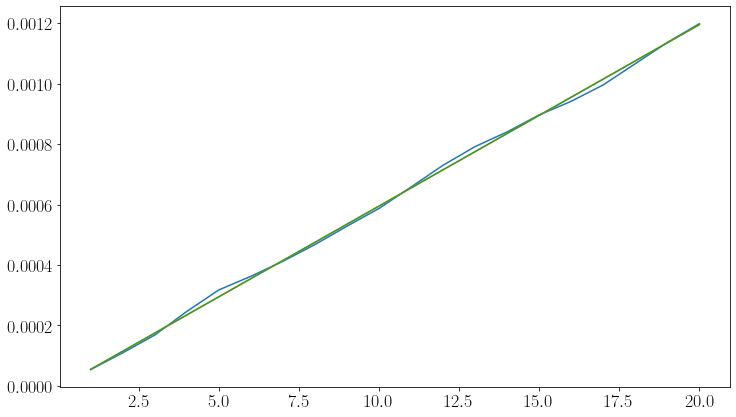

In [95]:
weights = 1/np.array(df.groupby("order").std()["distance"])
xs = np.arange(1, 21, step=1)
ys = np.array(df.groupby("order").mean()["distance"])
((pp0, pp1), residuals, rank, singular_values, rcond) = np.polyfit(xs, ys, 1, w=weights, full=True)


fig, ax = plt.subplots()
xs = np.arange(1, 21, step=1)
ax.plot(xs, df.groupby("order").mean()["distance"])
ax.plot(xs, xs*pp0+pp1)
ax.plot(xs, xs*pp0+pp1)

n = len(xs)
s_r = np.sqrt(residuals[0]/(n-2))

pp0, pp1, np.sqrt((n * s_r**2)/(n * np.sum(xs**2) - np.sum(xs)**2))

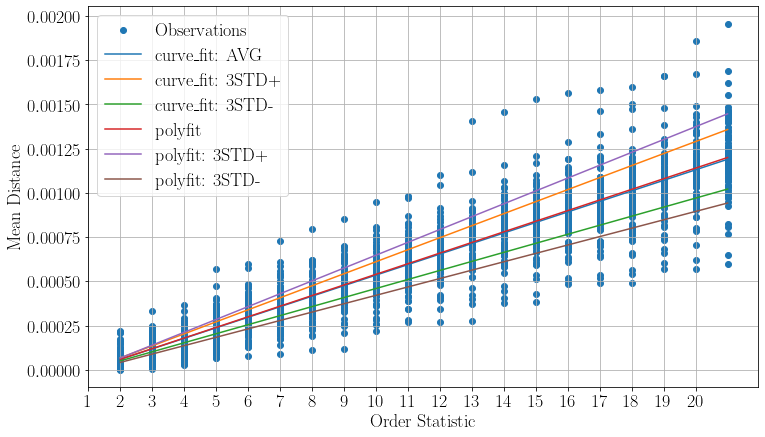

In [94]:
fig, ax = plt.subplots()

xs = np.arange(1, 21, step=1)
ax.scatter(df.iloc[:,0], df.iloc[:, 1], label="Observations")
ax.plot(xs, linear_fit(xs, popt[0]), label="curve_fit: AVG")
ax.plot(xs, linear_fit(xs, popt[0]+3*perr[0]), label="curve_fit: 3STD+")
ax.plot(xs, linear_fit(xs, popt[0]-3*perr[0]), label="curve_fit: 3STD-")

ax.plot(xs, xs*p0, label="polyfit")
ax.plot(xs, xs*(p0+3*np.sqrt(np.diag(V))[0])+p1, label="polyfit: 3STD+")
ax.plot(xs, xs*(p0-3*np.sqrt(np.diag(V))[0])+p1, label="polyfit: 3STD-")

ax.set_xticks(xs - 1); ax.set_xticklabels(xs), ax.grid(); ax.set_xlabel("Order Statistic"); ax.set_ylabel("Mean Distance")
ax.legend()

In [43]:
xs = []
ys = []
for i in range(0, 20):
    for j in range(len(df_filtered.iloc[i, 1:])):
        xs += [i + 1]
        ys += [df_filtered.iloc[i, j + 1]]
# z, residuals, rank, singular_values, rcond = np.polyfit(xs, ys, 1, full=True)
# print("z=", z)
# print("residuals=", residuals)
# print("rank=", rank)
# print("singular_values=", singular_values)
# print("rcond=",rcond)

with open("test_data.csv", "w") as f:
    for i in range(len(xs)):
        f.write(f"{xs[i]},{ys[i]}\n")


xs = np.array(xs)
ys = np.array(ys)
coeff = np.transpose([xs * xs, xs])
np.linalg.lstsq(coeff, ys)

NameError: name 'df_filtered' is not defined

In [174]:
# Linear fit
xySum = 0
x2Sum = 0
for i in range(len(xs)):
    xySum += xs[i] * ys[i]
    x2Sum += xs[i] * xs[i]

xySum / x2Sum

4.4218483365853646e-05

In [145]:
def linear_fit(x, a):
    return a * x


popt, pcov = sp.optimize.curve_fit(linear_fit, np.arange(1, 21, step=1), df_filtered.iloc[:, 1:].mean(),
                                   sigma=2 * df_filtered.iloc[:, 1:].std(), absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))
popt, pcov, perr

(array([5.9515256e-05]), array([[3.14682073e-11]]), array([5.60965305e-06]))

Text(0, 0.5, 'Mean Distance')

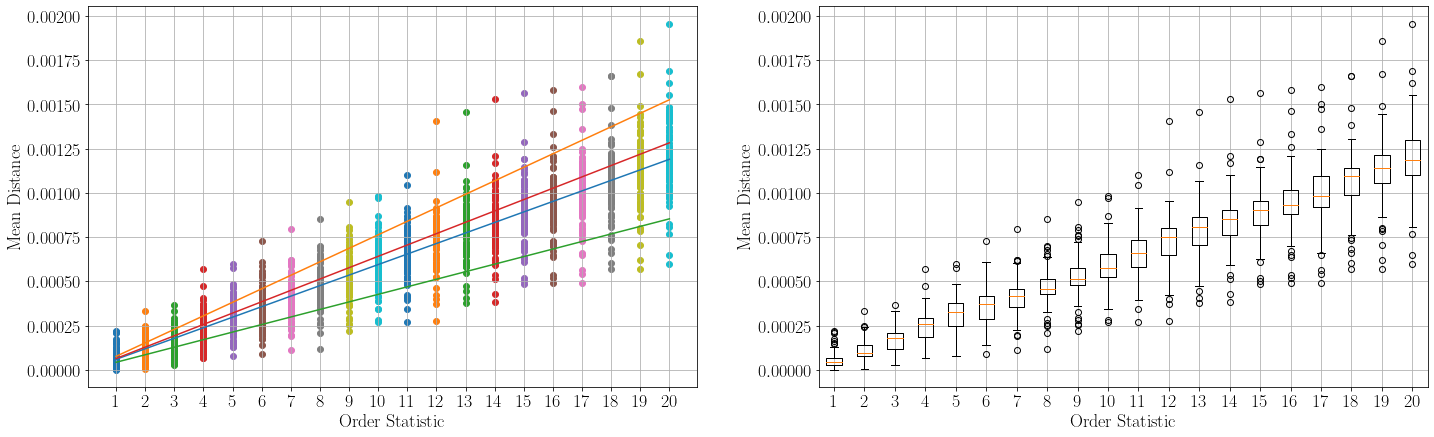

In [163]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[24, 7])

for i in range(20):
    ys = df_filtered[i + 1]
    ax1.scatter([i] * len(ys), ys)
xs = np.arange(1, 21, step=1)
ax1.plot(xs - 1, linear_fit(xs, popt[0]))
ax1.plot(xs - 1, linear_fit(xs, popt[0] + 3 * perr[0]))
ax1.plot(xs - 1, linear_fit(xs, popt[0] - 3 * perr[0]))
ax1.plot(xs - 1, xs * xySum / x2Sum)
ax1.set_xticks(xs - 1);
ax1.set_xticklabels(xs), ax1.grid();
ax1.set_xlabel("Order Statistic");
ax1.set_ylabel("Mean Distance")

ax2.boxplot(df_filtered.iloc[:, 1:])
ax2.grid();
ax2.set_xlabel("Order Statistic");
ax2.set_ylabel("Mean Distance")

In [131]:
network_size = 1 / popt[0] - 1
print("Network", network_size)
error = perr[0] / (popt[0] ** 2)
print("Error", error)

Network 16801.414486442733
Error 1583.7236017538742


In [6]:
dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S')

timestamps = []
network_sizes = []
sigmas = []
with open("optprov-2.logs", "r") as logs:
    ts = None
    for line in logs.readlines():
        if not line.startswith("Linear Regression"):
            ts = dateparse(line[:19])
        else:
            timestamps += [ts]
            network_sizes += [float(line[76:85])]
            sigmas += [float(line[92:99])]
timestamps = np.array(timestamps)
network_sizes = np.array(network_sizes)
sigmas = np.array(sigmas)

(0.0, 27089.394)

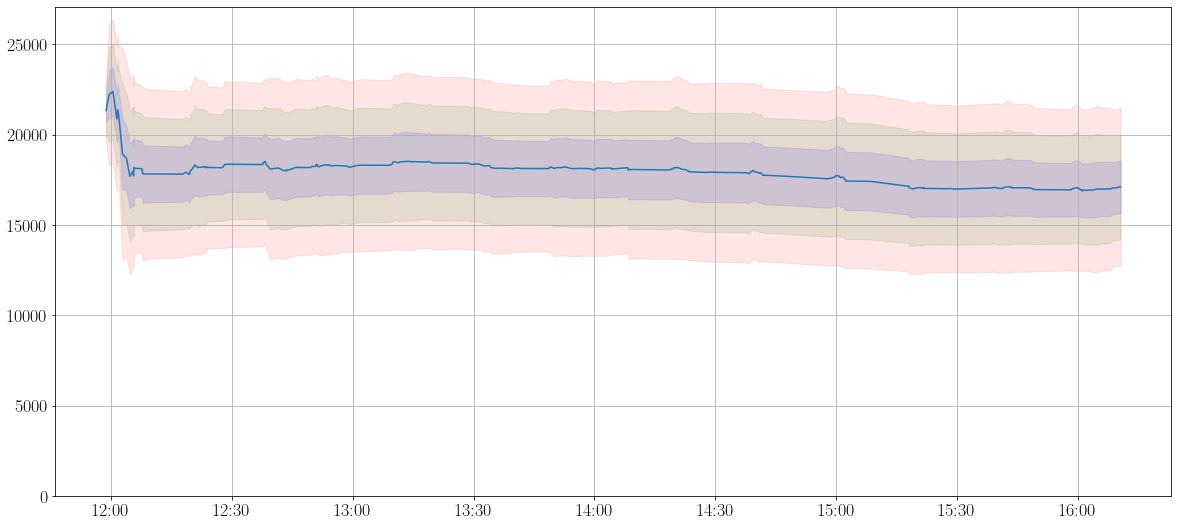

In [7]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=[20, 9])

ax.plot(timestamps, network_sizes); ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.fill_between(timestamps, (network_sizes-3*sigmas), (network_sizes+3*sigmas), color='r', alpha=.1)
ax.fill_between(timestamps, (network_sizes-2*sigmas), (network_sizes+2*sigmas), color='g', alpha=.1)
ax.fill_between(timestamps, (network_sizes-sigmas), (network_sizes+sigmas), color='b', alpha=.1)
ax.set_ylim(ymin=0)

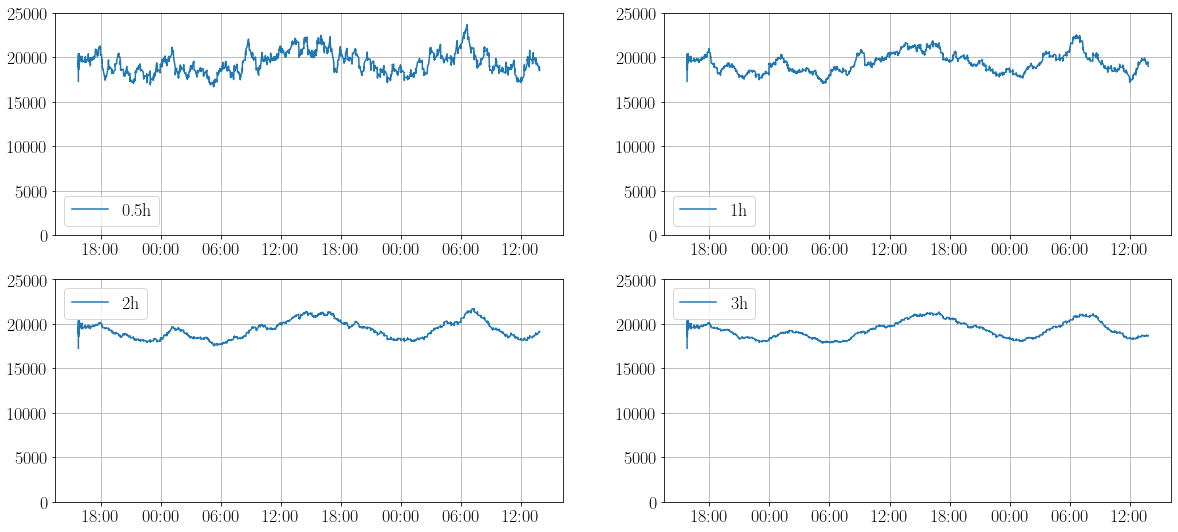

In [234]:
import re
from dateutil import parser

pattern = r"(.*)Z:.*: ([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\),([\d\.]+) \(\d+\)"


timestamps = []
network_sizes = {}
for i in range(20):
    network_sizes[i] = []
with open("netsize.logs", "r") as logs:
    ts = None
    for line in logs.readlines():
        match = re.search(pattern, line)
        if match is None:
            continue

        timestamps += [parser.parse(match.group(1))]
        for i in range(2,22):
            network_sizes[i-2].append(float(match.group(i)))

ts_df = pd.DataFrame(data=timestamps, columns=["timestamp"])
ns_df = pd.DataFrame(data=network_sizes)
df = pd.concat([ts_df, ns_df], axis=1)
def linear_fit(x, a):
    return a * x
def calc_net_size(row):
    popt, pcov = sp.optimize.curve_fit(
        linear_fit,
        np.arange(1, 21, step=1),
        row,
        # sigma=df.groupby("order").std()["distance"],
        # absolute_sigma=True
    )
    perr = np.sqrt(np.diag(pcov))
    popt, pcov, perr
    return 1/popt[0]
    # xs = np.arange(1, len(row)+1, step=1)
    # (p0, p1), V = np.polyfit(xs, row, 1, cov='unscaled')
    # return p0,p1
    # p0, p1, np.sqrt(np.diag(V))


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=[20, 9])

x = df.set_index('timestamp').rolling(window='1800s').mean().apply(calc_net_size, axis=1)
ax1.plot(x.index, x, label="0.5h")

x = df.set_index('timestamp').rolling(window='1h').mean().apply(calc_net_size, axis=1)
ax2.plot(x.index, x, label="1h")

x = df.set_index('timestamp').rolling(window='2h').mean().apply(calc_net_size, axis=1)
ax3.plot(x.index, x, label="2h")

x = df.set_index('timestamp').rolling(window='3h').mean().apply(calc_net_size, axis=1)
ax4.plot(x.index, x, label="3h")

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylim(ymin=0, ymax=25000)
    ax.grid(); ax.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

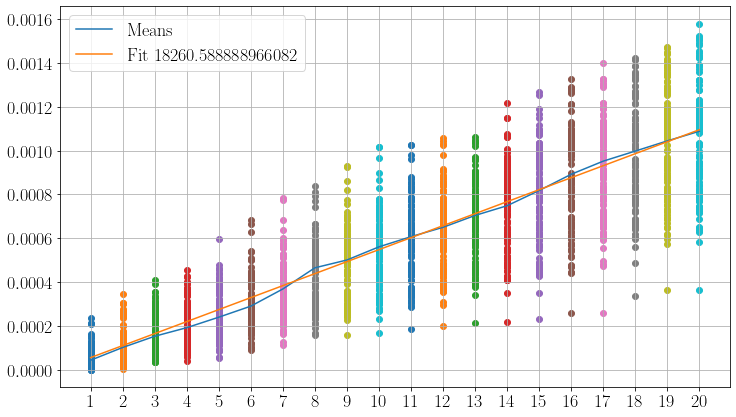

In [219]:
last_ts = df["timestamp"][df.index[-1]]

data = df[df["timestamp"] > last_ts - datetime.timedelta(hours=2)]

fig, ax = plt.subplots()

xs = np.arange(1, 21, step=1)
means = []
for i in range(20):
    ax.scatter([i+1]*len(data[i]), data[i])
    means += [data[i].mean()]
ax.plot(xs, means, label="Means")

def linear_fit(x, a):
    return a * x

popt, pcov = sp.optimize.curve_fit(
    linear_fit,
    xs,
    means,
    # sigma=df.groupby("order").std()["distance"],
    # absolute_sigma=True
)
perr = np.sqrt(np.diag(pcov))
ax.plot(xs, xs * popt[0], label=f"Fit {1/popt[0] - 1}")

ax.set_xticks(xs); ax.grid(); ax.legend()